In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# 1. Import Test

In [2]:
from pykrx import Krx
krx = Krx()
df = krx.get_market_ohlcv("20180801", "20190228", "187790")

# 2. NANO

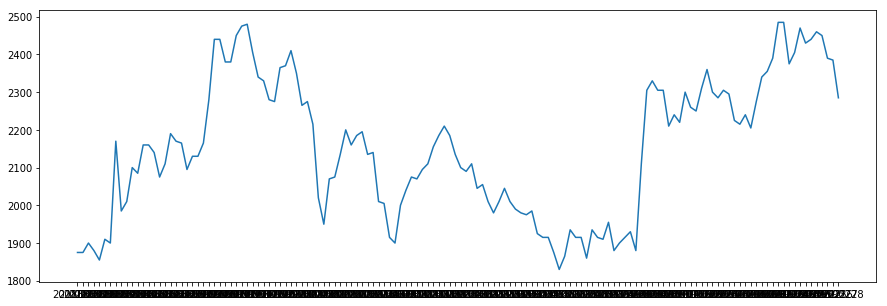

In [3]:
plt.figure(figsize=(15,5))
plt.plot(df['종가'])
plt.show()

## 1. 시가와 고가 및 저가 비교

In [6]:
df['고가시가차이'] = df['고가'] - df['시가']
df['저가시가차이'] = df['저가'] - df['시가']

In [7]:
print("시가가 저가인 경우: ", np.sum(df['저가시가차이'] == 0))
print("시가가 저가인 비율: ", (1 - np.sum(df['저가시가차이'] == 0) / len(df)) * 100)

시가가 저가인 경우:  9
시가가 저가인 비율:  93.57142857142857


In [8]:
print("시가가 고가인 경우: ", np.sum(df['고가시가차이'] == 0))
print("시가가 고가인 비율: ", (1 - np.sum(df['고가시가차이'] == 0) / len(df)) * 100)

시가가 고가인 경우:  19
시가가 고가인 비율:  86.42857142857143


### 하루동안 상향만 할 확률은 6% 하향만 할 확률은 약 13.5%이다.

## 2. 종가와 고가 및 저가 비교

In [9]:
df['상승'] = df['종가'] - df['시가']

In [10]:
print("상승한 날: ", np.sum(df['상승'] > 0 ))
print("하강한 날: ", np.sum(df['상승'] <= 0 ))

상승한 날:  61
하강한 날:  79


In [11]:
df['고가종가차이'] = df['고가'] - df['종가']
df['종가시가차이'] = df['종가'] - df['시가']

In [13]:
print("종가가 저가인 경우: ", np.sum(df['종가시가차이'] == 0))
print("종가가 저가인 비율(%): ", np.sum(df['종가시가차이'] == 0) / len(df) * 100)

종가가 저가인 경우:  5
종가가 저가인 비율(%):  3.571428571428571


In [15]:
print("종가가 고가인 경우: ", np.sum(df['고가종가차이'] == 0))
print("종가가 고가인 경우(%): ", np.sum(df['고가종가차이'] == 0) / len(df) * 100)

종가가 고가인 경우:  10
종가가 고가인 경우(%):  7.142857142857142


### 종가가 저가일 확률은 4%이고 종가가 고가일 확률은 7%이다.

## 3. 종가와 시가 차이

In [16]:
df_up = df[df['종가시가차이'] > 0]

In [20]:
print("상승한 경우: ", np.sum(df['종가시가차이'] > 0))
print("상승 중에서 저가가 시가보다 낮은 경우: ", np.sum(df_up['저가'] < df_up['시가']))
print("상승 중에서 종가가 고가보다 낮은 경우: ", np.sum(df_up['종가'] < df_up['고가']))

상승한 경우:  61
상승 중에서 저가가 시가보다 낮은 경우:  52
상승 중에서 종가가 고가보다 낮은 경우:  52


In [21]:
quantile = np.arange(0, 1.1, 0.1)

for q in quantile:
    print("quantile: ", q)
    print(np.quantile(df_up['저가'] - df_up['시가'], q=q))

quantile:  0.0
-110.0
quantile:  0.1
-60.0
quantile:  0.2
-45.0
quantile:  0.30000000000000004
-39.999999999999986
quantile:  0.4
-30.0
quantile:  0.5
-30.0
quantile:  0.6000000000000001
-19.999999999999964
quantile:  0.7000000000000001
-10.0
quantile:  0.8
-5.0
quantile:  0.9
0.0
quantile:  1.0
0.0


In [22]:
quantile = np.arange(0, 1.1, 0.1)

for q in quantile:
    print("quantile: ", q)
    print(np.quantile(df_up['종가'] - df_up['고가'], q=q))

quantile:  0.0
-250.0
quantile:  0.1
-75.0
quantile:  0.2
-60.0
quantile:  0.30000000000000004
-49.999999999999964
quantile:  0.4
-35.0
quantile:  0.5
-25.0
quantile:  0.6000000000000001
-19.999999999999964
quantile:  0.7000000000000001
-10.0
quantile:  0.8
-10.0
quantile:  0.9
0.0
quantile:  1.0
0.0


In [24]:
print("상승 할 경우 중앙값 종가와 고가 차이: ", np.median((df_up['종가'] - df_up['시가'])))
print("상승 할 경우 중앙값 시가와 고가 차이: ", np.median((df_up['고가'] - df_up['시가'])))
print("상승 할 경우 중앙값 종가와 고가 차이: ", np.median((df_up['고가'] - df_up['종가'])))

상승 할 경우 중앙값 종가와 고가 차이:  30.0
상승 할 경우 중앙값 시가와 고가 차이:  70.0
상승 할 경우 중앙값 종가와 고가 차이:  25.0


### 상승해도 52/61는 시가보다 낮은 케이스가 있다. 그리고 보통 고가는 70원 오르고 종가는 25원 오른다.

In [26]:
df_down = df[df['종가시가차이'] < 0]

In [27]:
print("하강한 경우: ", np.sum(df['종가시가차이'] < 0))
print("하강 중에서 고가가 시가보다 큰 경우: ", np.sum(df_down['고가'] > df_down['시가']))
print("하강 중에서 고가가 시가보다 큰 경우: ", np.sum(df_down['저가'] < df_down['종가']))

하강한 경우:  74
하강 중에서 고가가 시가보다 큰 경우:  56
하강 중에서 고가가 시가보다 큰 경우:  64


In [31]:
print("하강 할 경우 평균 시가와 종가 차이: ", np.median((df_down['종가'] - df_down['시가'])))
print("하강 할 경우 평균 저가와 시가 차이: ", np.median((df_down['저가'] - df_down['시가'])))
print("하강 할 경우 평균 저가와 종가 차이: ", np.median((df_down['저가'] - df_down['종가'])))

하강 할 경우 평균 시가와 종가 차이:  -37.5
하강 할 경우 평균 저가와 시가 차이:  -67.5
하강 할 경우 평균 저가와 종가 차이:  -25.0


In [43]:
quantile = np.arange(0, 1.1, 0.1)

for q in quantile:
    print("quantile: ", q)
    print(np.quantile(df_down['저가'] - df_down['시가'], q=q))

quantile:  0.0
-185.0
quantile:  0.1
-130.0
quantile:  0.2
-100.0
quantile:  0.30000000000000004
-90.0
quantile:  0.4
-75.0
quantile:  0.5
-67.5
quantile:  0.6000000000000001
-55.0
quantile:  0.7000000000000001
-50.0
quantile:  0.8
-40.0
quantile:  0.9
-30.0
quantile:  1.0
-10.0


In [33]:
quantile = np.arange(0, 1.1, 0.1)

for q in quantile:
    print("quantile: ", q)
    print(np.quantile(df_down['종가'] - df_down['시가'], q=q))

quantile:  0.0
-160.0
quantile:  0.1
-95.0
quantile:  0.2
-80.0
quantile:  0.30000000000000004
-60.499999999999986
quantile:  0.4
-45.0
quantile:  0.5
-37.5
quantile:  0.6000000000000001
-30.99999999999998
quantile:  0.7000000000000001
-25.0
quantile:  0.8
-20.0
quantile:  0.9
-11.499999999999986
quantile:  1.0
-5.0


### 하강해도 56/74는 시가보다 크다. 보통 시가보다 저가는 -67.5원 하락하고 종가는 -37.5원 하락한다.

# 전략

## 1. 2018년 8월부터 2019년 2월

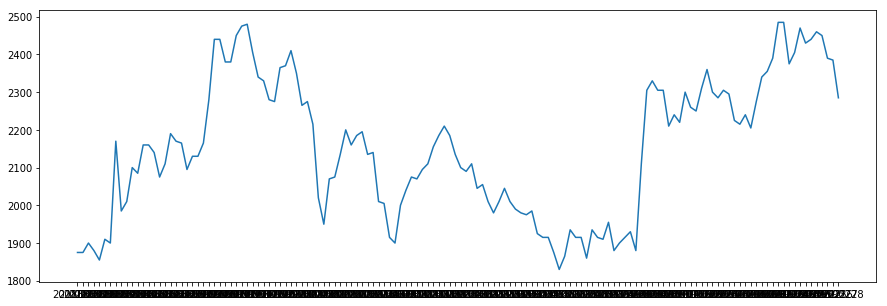

In [34]:
plt.figure(figsize=(15,5))
plt.plot(df['종가'])
plt.show()

In [35]:
print("해당 기간 내 데이터 개수: ", len(df))

해당 기간 내 데이터 개수:  140


### 1. 종가나 시가가 저가나 고가인 경우는 드물다. (20% 이하)

- 시가-저가: 9
- 시가-고가: 19

#### 하루동안 상향만 할 확률은 6% 하향만 할 확률은 약 13.5%이다.

#### 교훈: 처음부터 살려고 노력할 필요 없다.

### 2. 상승할 경우 하루에 한 번이라도 시가보다 내릴 확률은 52 / 61이다.

- 종가가 시가보다 내려도 하루에 한 번이라도 시가보다 클 확률은 52 / 61이다.
- 교훈: 상승해도 시가보다 저렴하게 산다.
- 중앙값 기준으로 -30원까지는 빠진다.

상승해도 52/61는 시가보다 낮은 케이스가 있다. 그리고 보통 고가는 70원 오르고 종가는 25원 오른다.

### 3. 상승할 경우 종가가 최고일 경우일 확률은  9 / 61 이다.

- 종가까지 가지고 가기보다는 상승 할 때는 종가 전에 파는 게 좋다. (수수료 계산)
- 교훈: 시가보다 70 - 85원 넘을 때 판다. 
- 종가는 시가보다 25원 높다.

### 4. 하강해도 고가 시가 보다 높을 확률은 56 / 74이다.

#### - 중앙값 시가는 저가보다 67.5원 높다.

### 5. 하강할 경우 저가가 종가일 확률은 10 / 74이다.

- 중앙값 종가는 저가보다 25원 높다.

하강해도 56/74는 시가보다 크다. 보통 시가보다 저가는 -67.5원 하락하고 종가는 -37.5원 하락한다.

# 전략 2. 중요 질문: 언제 상승하고 언제 하강하는가

- 시간별 데이터가 필요하다.

In [36]:
def updown(x):
    if x > 0:
        return 1
    else:
        return -1

In [37]:
df['상승하강여부'] = df['종가시가차이'].apply(lambda x: updown(x))

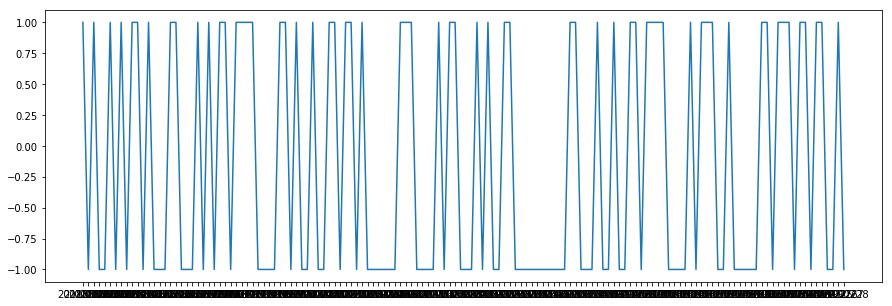

In [38]:
plt.figure(figsize=(15,5))
plt.plot(df['상승하강여부'])
plt.show()

### 1. 2015년 - 2018년까지 봄에 상승한다.

- 2017년, 2018년은 3월 말까지 상승하고 빠지는 경향이 있다.

In [39]:
df = krx.get_market_ohlcv("20140101", "20190301", "187790")
df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
20140508,2090,2100,2030,2065,709907
20140509,2045,2055,2045,2050,152994
20140512,2050,2055,2045,2055,90885
20140513,2050,2055,2050,2050,100302
20140514,2035,2055,2035,2050,118138


### 전체 기간

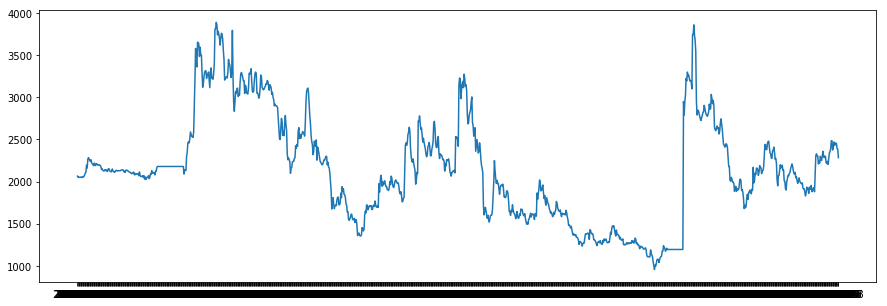

In [40]:
plt.figure(figsize=(15,5))
plt.plot(df['종가'])
plt.show()

## 봄 효과

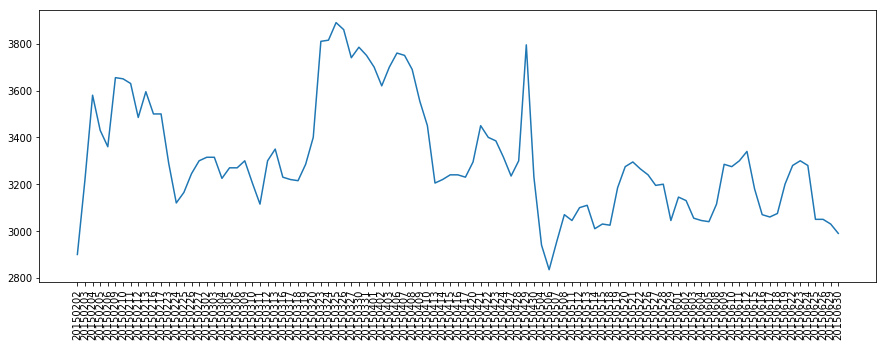

In [41]:
plt.figure(figsize=(15,5))
plt.plot(df.loc['20150201':'20150630']['종가'])
plt.xticks(rotation=90)
plt.show()

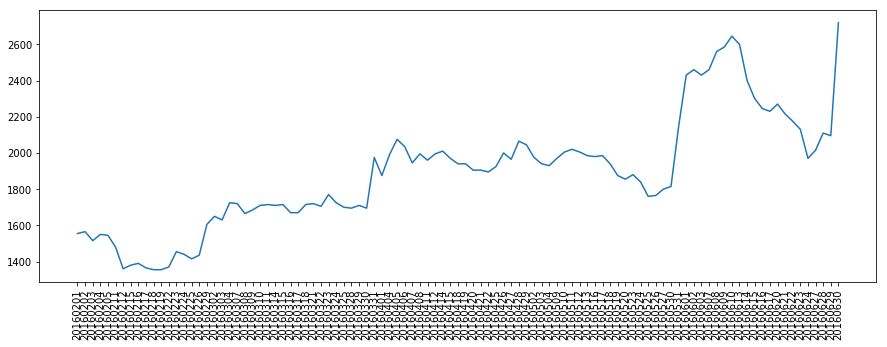

In [42]:
plt.figure(figsize=(15,5))
plt.plot(df.loc['20160201':'20160630']['종가'])
plt.xticks(rotation=90)
plt.show()

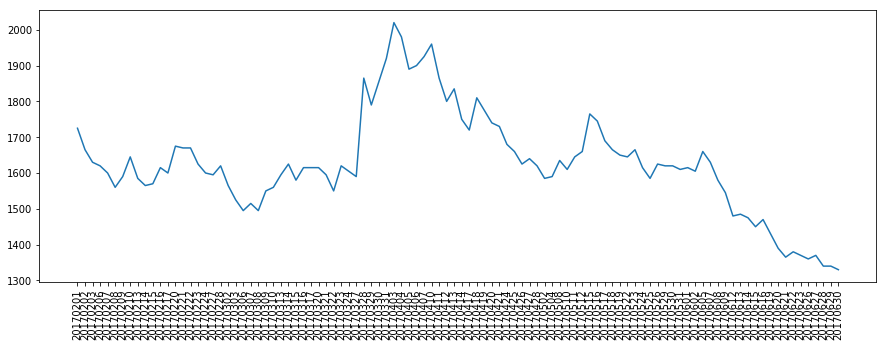

In [43]:
plt.figure(figsize=(15,5))
plt.plot(df.loc['20170201':'20170630']['종가'])
plt.xticks(rotation=90)
plt.show()

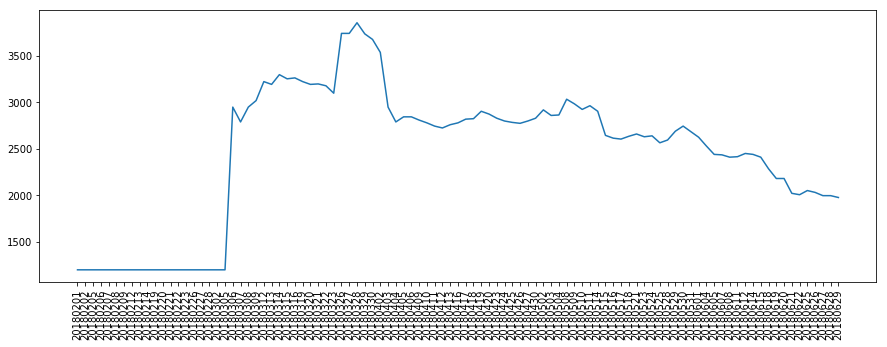

In [44]:
plt.figure(figsize=(15,5))
plt.plot(df.loc['20180201':'20180630']['종가'])
plt.xticks(rotation=90)
plt.show()

# 전략 3. 3%이상 하강하고 나서 그 다음 날도 빠지는 경우

In [45]:
df = krx.get_market_ohlcv("20180801", "20190228", "187790")
df['상승하강'] = df['종가'] - df['시가'] 

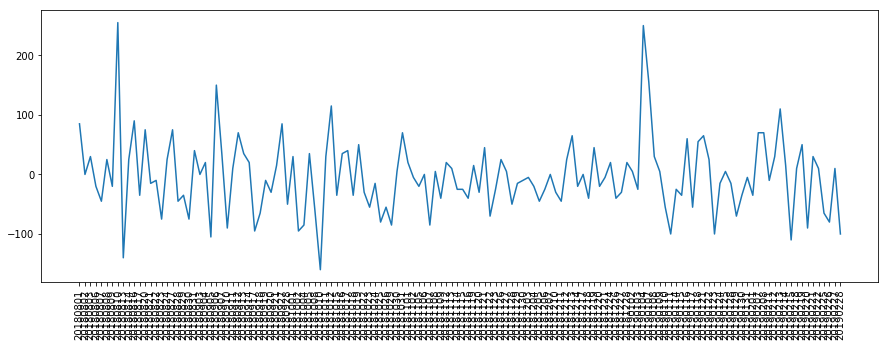

In [46]:
plt.figure(figsize=(15,5))
plt.plot(df['상승하강'])
plt.xticks(rotation=90)
plt.show()

### 3% 이상 빠지고 다음 날도 하락하는 경우

In [47]:
df['내일종가'] = df['종가'].shift(-1)
df_minus = df[df['상승하강'] <= df['시가'] * (-1) * 0.03]
df_minus['상승하강내일'] = df_minus['내일종가'] - df_minus['종가']
dist = df_minus['상승하강내일'][:-1]

/anaconda3/envs/investment/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([1., 1., 1., 0., 0., 0., 1., 0., 2., 3., 1., 2., 0., 1., 4., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-85.        , -76.83333333, -68.66666667, -60.5       ,
        -52.33333333, -44.16666667, -36.        , -27.83333333,
        -19.66666667, -11.5       ,  -3.33333333,   4.83333333,
         13.        ,  21.16666667,  29.33333333,  37.5       ,
         45.66666667,  53.83333333,  62.        ,  70.16666667,
         78.33333333,  86.5       ,  94.66666667, 102.83333333,
        111.        , 119.16666667, 127.33333333, 135.5       ,
        143.66666667, 151.83333333, 160.        ]),
 <a list of 30 Patch objects>)

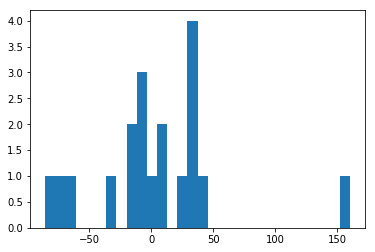

In [48]:
plt.hist(dist, bins=30)